## Neural Network From Scratch

by Rina Buoy, PhD

This simple neural network model demonstrates:

1. Network design with one hidden layer.

2. Forward propagation to compute activations.

3. Binary cross-entropy loss computation.

4. Backward propagation for gradient computation.

5. Parameter updates using gradient descent.

This setup can classify points into two classes based on the relationship between X[:, 0] and X[:, 1]. Adjusting the number of nodes, layers, or epochs can improve accuracy.

#### Step 1: Set up the imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Generate Sample Data

In [3]:
np.random.seed(42)  # For reproducibility

# Generate 100 random points for two classes
X = np.random.randn(100, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Points where x*y > 0 are in class 1
y = y.reshape(-1, 1)

Text(0.5, 1.0, 'A binary classification with 2 features')

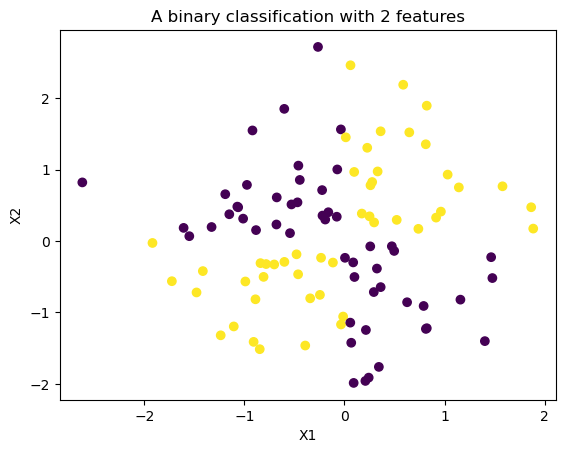

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('A binary classification with 2 features')



### Step 3: Define the Neural Network Structure

We’ll use a neural network with:

Input layer of 2 nodes (for 2 features),
1 hidden layer with 4 nodes,
Output layer with 1 node (for binary classification).

In [5]:
# Define network dimensions
input_dim = 2
hidden_dim = 4
output_dim = 1

# Initialize weights and biases with small random values
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))


#### Step 4: Define Activation and Loss Functions

We’ll use the ReLU activation for the hidden layer and sigmoid for the output layer.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def binary_cross_entropy(predictions, targets):
    # Binary cross-entropy loss
    m = targets.shape[0]
    return -np.mean(targets * np.log(predictions + 1e-9) + (1 - targets) * np.log(1 - predictions + 1e-9))


#### Step 5: Forward Propagation

Compute the activations for each layer in the network.

In [7]:
def forward_propagation(X):
    # Hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    
    # Output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2


#### Step 6: Backward Propagation
Compute gradients of weights and biases.

In [8]:
def backward_propagation(X, y, Z1, A1, Z2, A2):
    m = X.shape[0]
    
    # Output layer gradients
    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    
    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2


#### Step 7: Gradient Descent Update

In [9]:
learning_rate = 0.1

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


#### Step 8: Training Loop

Now we’ll combine everything and run a training loop for several epochs.

In [10]:
epochs = 1000

for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X)
    
    # Compute loss
    loss = binary_cross_entropy(A2, y)
    
    # Backward propagation
    dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2)
    
    # Update parameters
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6922
Epoch 200, Loss: 0.6912
Epoch 300, Loss: 0.6854
Epoch 400, Loss: 0.6610
Epoch 500, Loss: 0.6253
Epoch 600, Loss: 0.5914
Epoch 700, Loss: 0.5485
Epoch 800, Loss: 0.5043
Epoch 900, Loss: 0.4531


#### Step 9: Testing the Model

After training, let’s test the model's accuracy.

In [11]:
def predict(X):
    _, _, _, A2 = forward_propagation(X)
    return (A2 > 0.5).astype(int)

# Test accuracy on training data
predictions = predict(X)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


Training Accuracy: 84.00%


#### Additional: Model Parameter Count and FLOPs

1. Parameter Count: The total number of parameters in a neural network is the sum of the number of weights and biases for each layer.

2. FLOP Count: The FLOPs for a fully connected layer are calculated based on the number of multiplications and additions. Each weight requires a multiplication with an input and an addition to the output for each neuron in the layer.



In [12]:
def count_parameters():
    total_params = 0
    total_params += W1.size + b1.size  # Parameters for first layer
    total_params += W2.size + b2.size  # Parameters for second layer
    return total_params

def count_flops(X):
    # FLOPs for fully connected layers = 2 * (input_size * output_size)
    # This accounts for multiplications and additions
    
    flops = 0
    
    # FLOPs for first layer
    input_size = X.shape[1]
    hidden_size = W1.shape[1]
    flops += 2 * input_size * hidden_size  # Multiplications and additions
    
    # FLOPs for ReLU activations (just comparisons, typically count as 1 FLOP each)
    flops += hidden_size
    
    # FLOPs for second layer
    flops += 2 * hidden_size * W2.shape[1]
    
    # FLOPs for sigmoid activation in output layer
    flops += W2.shape[1] * 4  # Sigmoid (multiplications, divisions, exponentiation)
    
    return flops

# Example usage:
print(f"Total Parameters: {count_parameters()}")
print(f"Total FLOPs per forward pass: {count_flops(X)}")


Total Parameters: 17
Total FLOPs per forward pass: 32


Generally, the FLOPs for backpropagation are about twice as much as the forward pass because:

Gradient Computation: The gradients for weights, biases, and activations require both multiplications and additions similar to the forward pass.
Chain Rule Application: Additional operations are needed to propagate the error backward.
Here’s an approximate breakdown of the FLOPs required for each layer in the backward pass:

1. Output Layer:

Gradient of Loss w.r.t Output: Similar to forward pass FLOPs.
Gradient w.r.t Weights and Biases: Roughly equivalent to forward pass for each parameter.
Propagation of Error to Previous Layer: Similar in complexity to forward pass.

2. Hidden Layer:

Gradient w.r.t Activations: Similar to the forward pass, plus the application of the derivative of the activation function (e.g., ReLU or sigmoid).
Gradient w.r.t Weights and Biases: Similar to forward pass.
Propagation of Error: Similar to forward pass.
Using these principles, here’s an approximate calculation of FLOPs for the backward pass:

In [13]:
def count_backward_flops(X):
    # Backward FLOPs calculation for each layer
    flops = 0

    # Output layer FLOPs
    hidden_size = W1.shape[1]
    output_size = W2.shape[1]
    
    # Gradient of loss with respect to A2
    flops += output_size  # For binary cross-entropy loss

    # Gradient of output layer weights and biases
    flops += 2 * hidden_size * output_size  # Gradient of W2 and bias (multiplies and additions)

    # Propagating gradient back to hidden layer (similar to forward pass)
    flops += 2 * hidden_size * output_size

    # Hidden layer FLOPs
    input_size = X.shape[1]
    
    # Gradient with respect to A1, involving the derivative of ReLU
    flops += hidden_size  # ReLU derivatives (1 comparison per neuron)

    # Gradient of hidden layer weights and biases
    flops += 2 * input_size * hidden_size  # Gradient of W1 and bias (multiplies and additions)
    
    # Propagation of gradient back to input layer
    flops += 2 * input_size * hidden_size

    return flops

# Example usage:
print(f"Total FLOPs for backward pass: {count_backward_flops(X)}")


Total FLOPs for backward pass: 53


#### Next ?

What if we add additional hidden layers ?

What if we use different activation function ?

What if we use a linear regression loss ?